In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
df = pd.read_csv('/content/Social_Network_Ads.csv')
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
print(df.isnull().sum())
print(df.duplicated().sum())

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
33


In [ ]:

df_cleaned = df.drop_duplicates()


In [ ]:

print(df_cleaned.duplicated().sum())


0


In [ ]:
df=df_cleaned.copy()

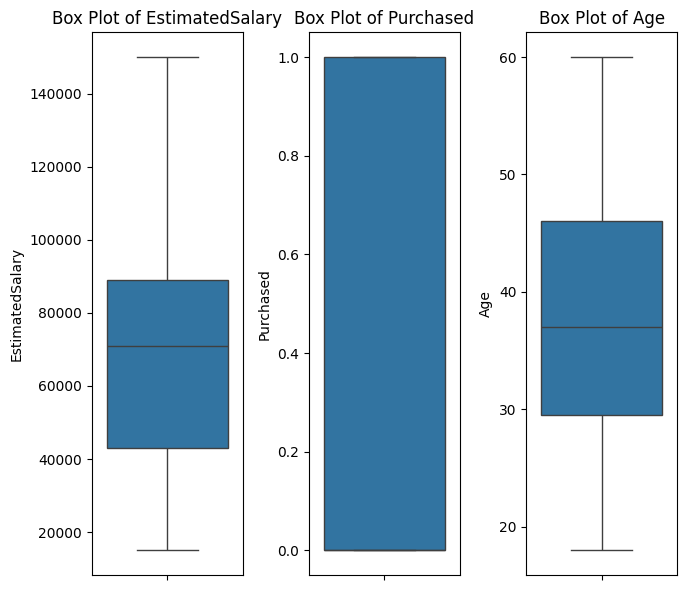

In [ ]:

columns = ['EstimatedSalary',	'Purchased',	'Age']

plt.figure(figsize=(20, 6))
for i, col in enumerate(columns, 1):
    plt.subplot(1, 9, i)
    sns.boxplot(df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df[column + '_outlier_iqr'] = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))
    return df


def remove_outliers(df, column):
    return df[~df[column + '_outlier_iqr']]

In [ ]:
def process_outliers(df, columns):
    df_cleaned = df.copy()
    for col in columns:
        if col in df_cleaned.columns:
            df_cleaned = identify_outliers_iqr(df_cleaned, col)
            df_cleaned = remove_outliers(df_cleaned, col)
            num_outliers = df_cleaned[col + '_outlier_iqr'].sum()  # Use col here
            print(f"Number of outliers in {col} using IQR: {num_outliers}")
    return df_cleaned
df_cleaned = process_outliers(df, columns)

print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape after removing outliers: {df_cleaned.shape}")

Number of outliers in EstimatedSalary using IQR: 0
Number of outliers in Purchased using IQR: 0
Number of outliers in Age using IQR: 0
Original DataFrame shape: (367, 3)
Cleaned DataFrame shape after removing outliers: (367, 6)


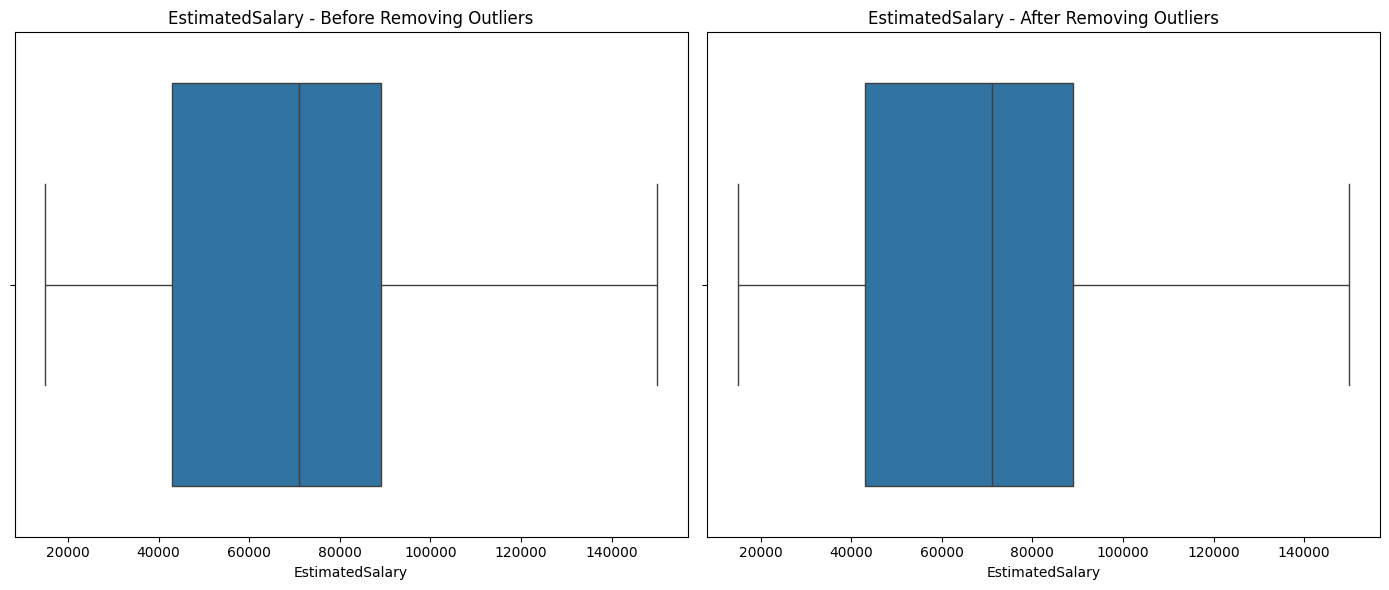

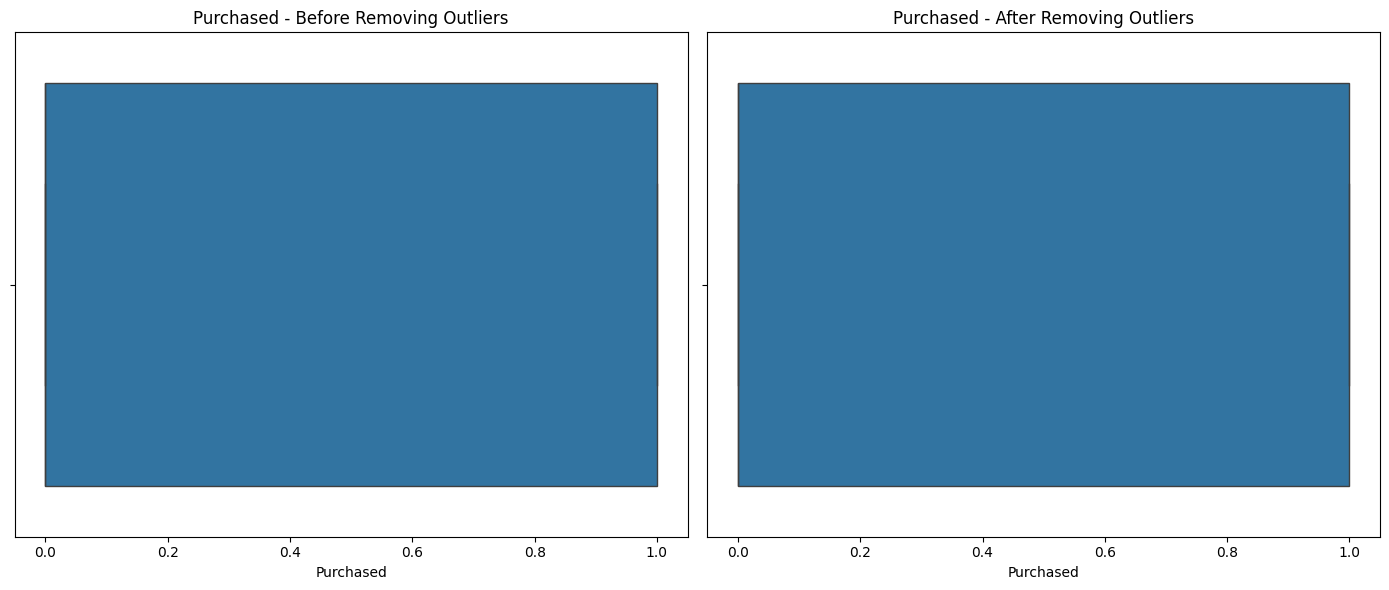

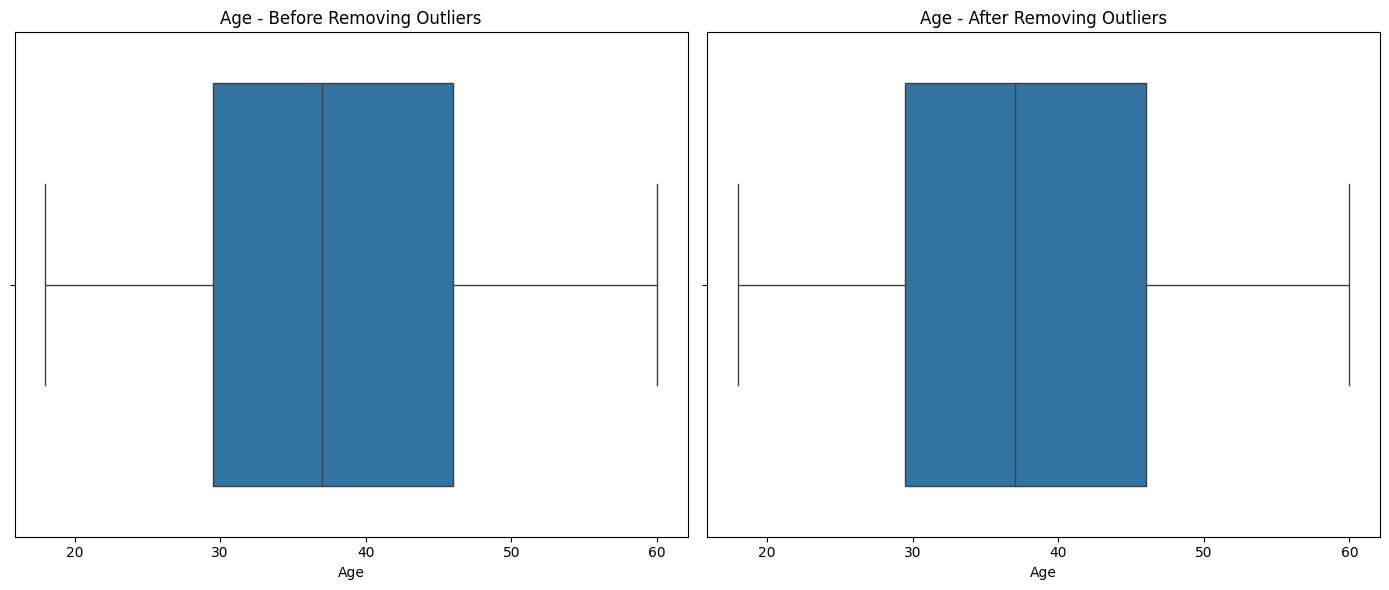

In [ ]:
def plot_box_plots(df, cleaned_df, column):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column].dropna())
    plt.title(f'{column} - Before Removing Outliers')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=cleaned_df[column].dropna())
    plt.title(f'{column} - After Removing Outliers')

    plt.tight_layout()
    plt.show()


for col in columns:
    if col in df.columns:
        plot_box_plots(df, df_cleaned, col)

In [ ]:
df_update=df_cleaned.copy()
df_update

,Age,EstimatedSalary,Purchased,EstimatedSalary_outlier_iqr,Purchased_outlier_iqr,Age_outlier_iqr
0,19,19000,0,False,False,False
1,35,20000,0,False,False,False
2,26,43000,0,False,False,False
3,27,57000,0,False,False,False
4,19,76000,0,False,False,False
...,...,...,...,...,...,...
395,46,41000,1,False,False,False
396,51,23000,1,False,False,False
397,50,20000,1,False,False,False
398,36,33000,0,False,False,False


In [ ]:
df_update['Purchased'].value_counts()

,count
Purchased,
0,229
1,138


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report


df = df_update.copy()


X = df.drop('Purchased', axis=1)
y = df['Purchased']


poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


pipeline = Pipeline(steps=[
    ('classifier', LogisticRegression())
])


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy after resampling and standardization: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy after resampling and standardization: 0.91
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        64
           1       0.93      0.89      0.91        74

    accuracy                           0.91       138
   macro avg       0.91      0.91      0.91       138
weighted avg       0.91      0.91      0.91       138



In [ ]:
print(df.columns)


Index(['Age', 'EstimatedSalary', 'Purchased', 'EstimatedSalary_outlier_iqr',
       'Purchased_outlier_iqr', 'Age_outlier_iqr'],
      dtype='object')


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print(f"Accuracy of Classification Decision Tree: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))


Accuracy of Classification Decision Tree: 0.81
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        63
           1       0.78      0.79      0.78        48

    accuracy                           0.81       111
   macro avg       0.81      0.81      0.81       111
weighted avg       0.81      0.81      0.81       111



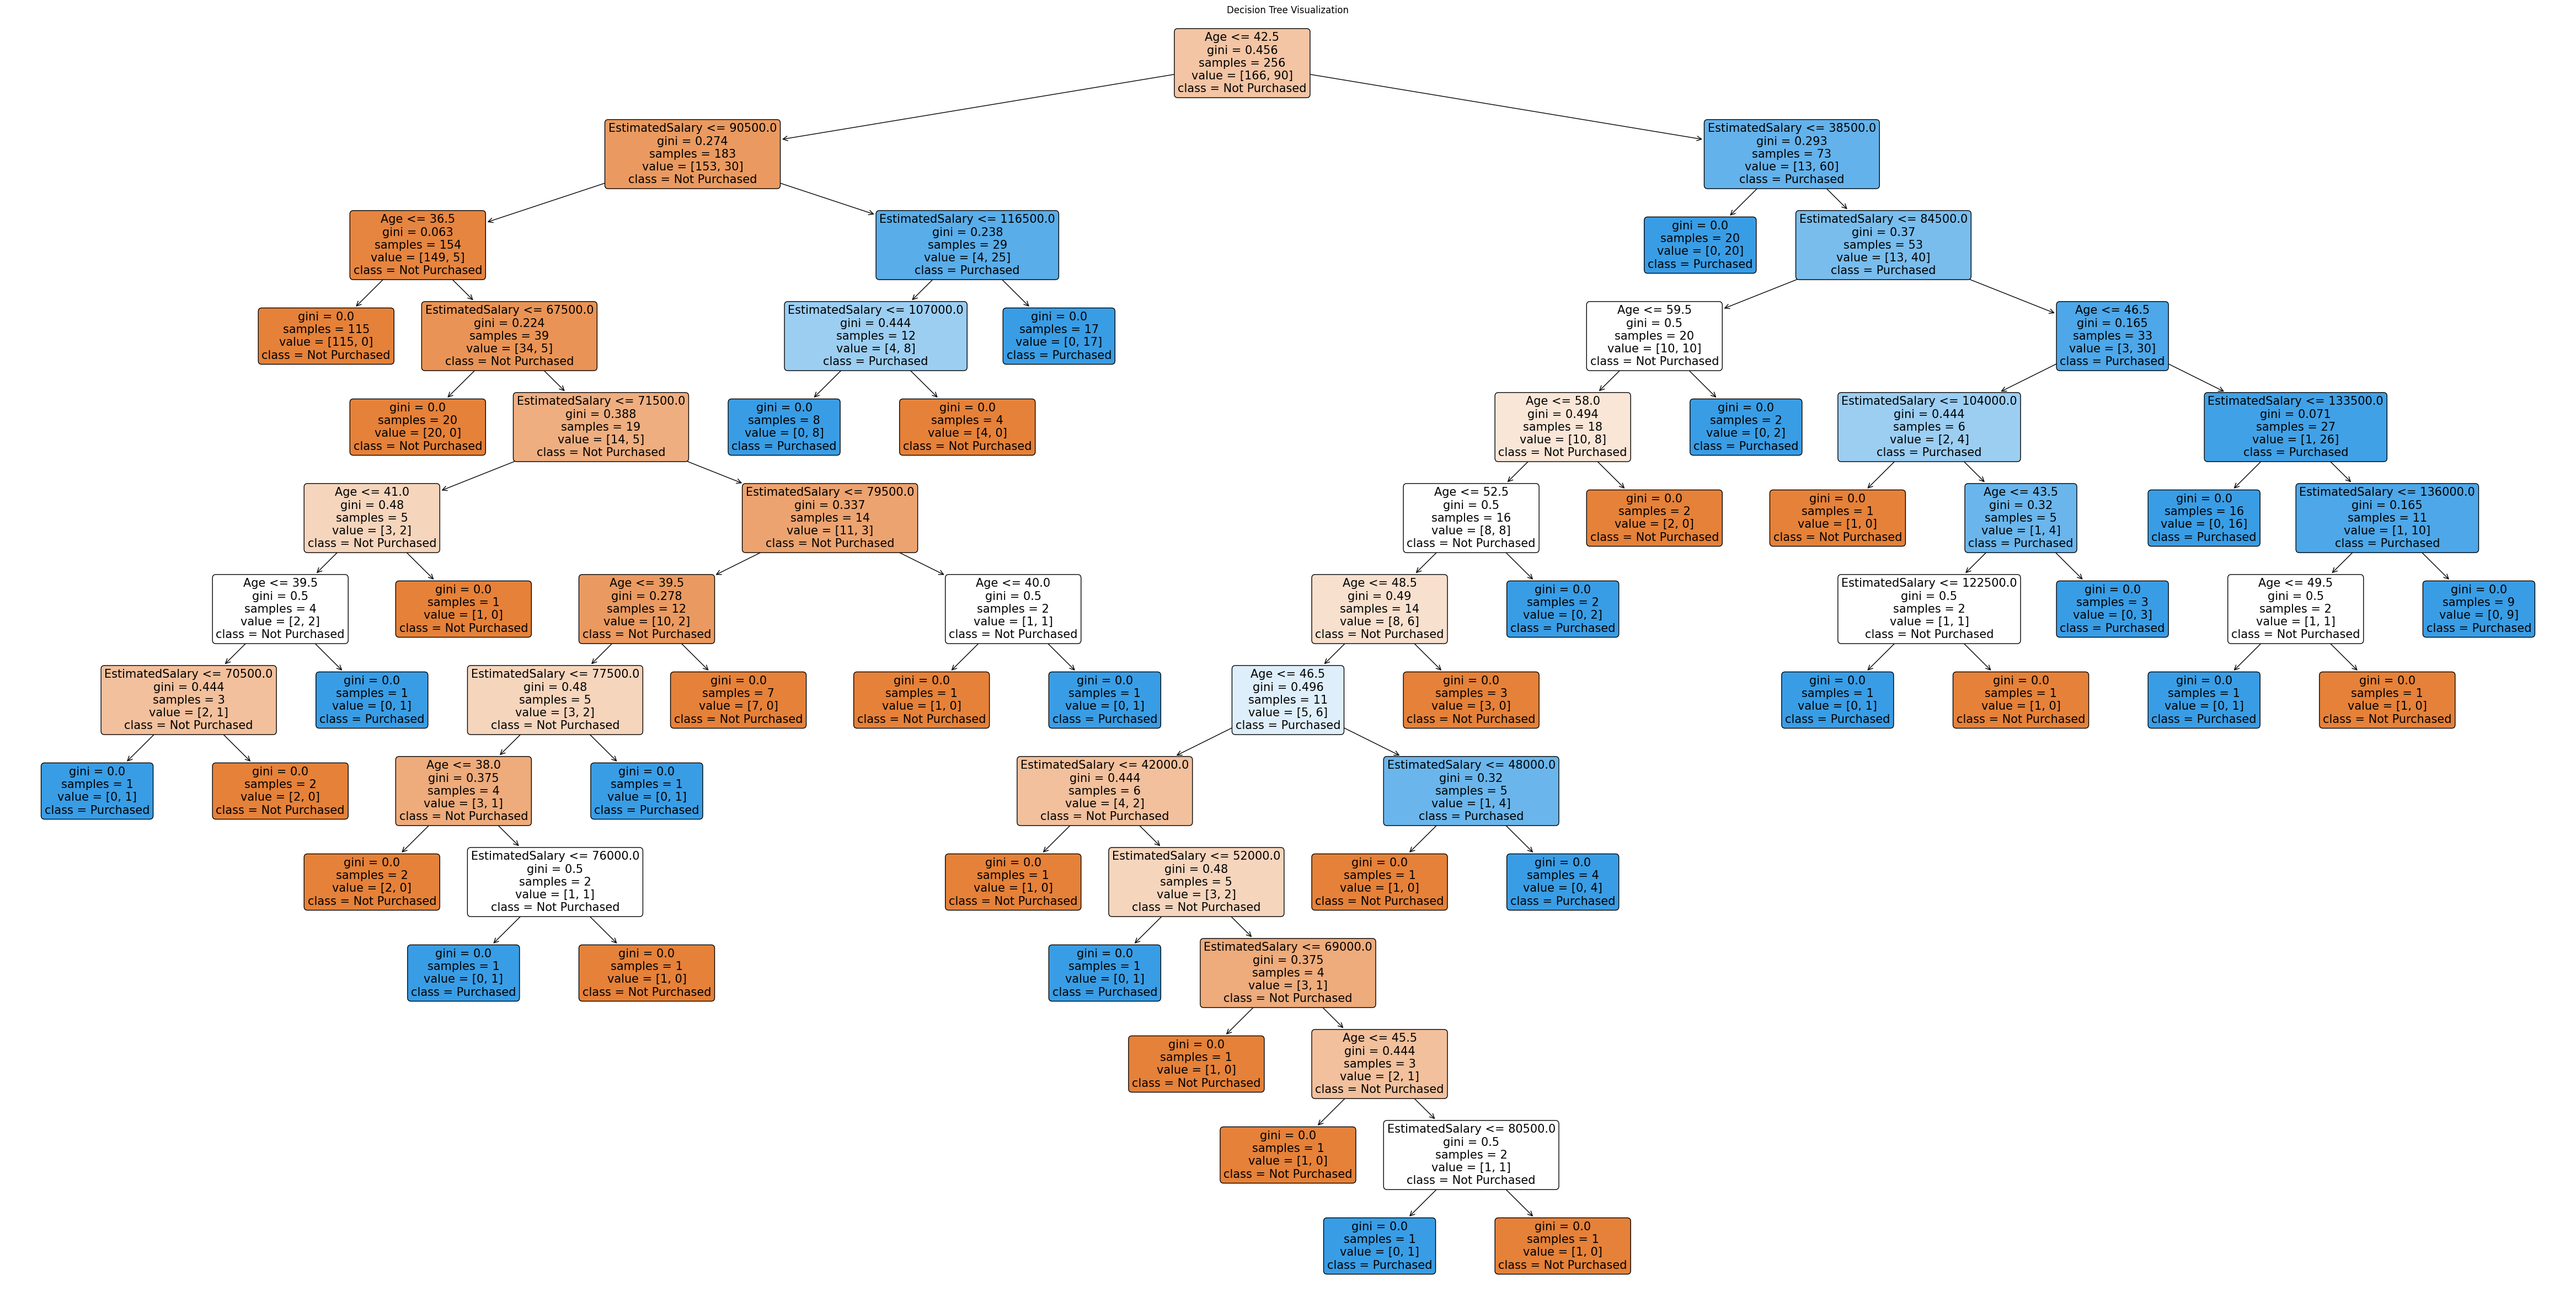

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60, 30))
plot_tree(clf, filled=True, feature_names=['Age', 'EstimatedSalary'], class_names=['Not Purchased', 'Purchased'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


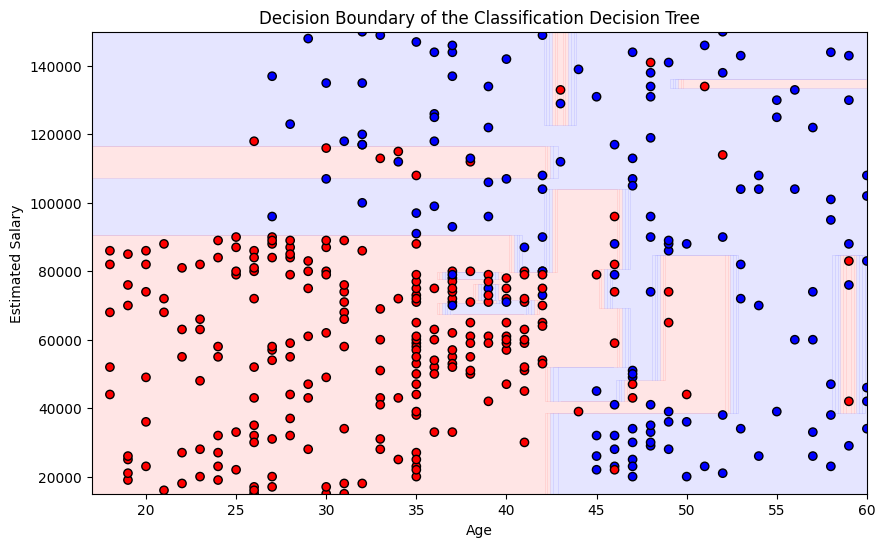

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define the plot limits
x_min, x_max = X['Age'].min() - 1, X['Age'].max() + 1
y_min, y_max = X['EstimatedSalary'].min() - 1, X['EstimatedSalary'].max() + 1

# Create a mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))

# Predict over the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X['Age'], X['EstimatedSalary'], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Decision Boundary of the Classification Decision Tree')
plt.show()
